In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = sns.load_dataset('iris')

In [30]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
28,5.2,3.4,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
88,5.6,3.0,4.1,1.3,versicolor
106,4.9,2.5,4.5,1.7,virginica


In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [32]:
df = df[['sepal_length','petal_length','species']]

In [33]:
df.sample(5)

,sepal_length,petal_length,species
109,7.2,6.1,2
26,5.0,1.6,0
134,6.1,5.6,2
77,6.7,5.0,1
5,5.4,1.7,0


In [34]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [35]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial')

In [38]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


In [41]:
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [42]:
# predication

query = np.array([[2.6,3.2]])
clf.predict_proba(query)

array([[0.67950868, 0.30905495, 0.01143637]])

In [43]:
clf.predict(query)

array([0])

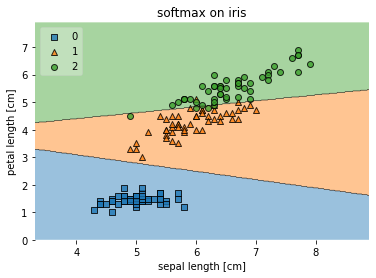

In [44]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,clf,legend=2)

# add axes annotations

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('softmax on iris')

plt.show()


In [45]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random x and y values (100 data points)
n = 100  # Number of rows
x = np.random.uniform(0, 10, n)  # Random values for x between 0 and 10
y = np.random.uniform(0, 10, n)  # Random values for y between 0 and 10

# Create a non-linear condition (circle equation: (x-5)^2 + (y-5)^2 < r^2)
radius = 5  # Define a radius
center_x, center_y = 5, 5  # Center of the circle
distance = (x - center_x)**2 + (y - center_y)**2  # Calculate distance from center

# Classify based on whether the point is inside or outside the circle
output = np.where(distance < radius**2, 1, 0)

# Create a DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'output': output
})

# Display the first 5 rows
print(df.head(5))


          x         y  output
0  3.745401  0.314292       1
1  9.507143  6.364104       1
2  7.319939  3.143560       1
3  5.986585  5.085707       1
4  1.560186  9.075665       0


In [46]:
df.head()

,x,y,output
0,3.745401,0.314292,1
1,9.507143,6.364104,1
2,7.319939,3.143560,1
3,5.986585,5.085707,1
4,1.560186,9.075665,0


In [47]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [48]:
y

0     1
1     1
2     1
3     1
4     0
     ..
95    1
96    1
97    1
98    0
99    1
Name: output, Length: 100, dtype: int64

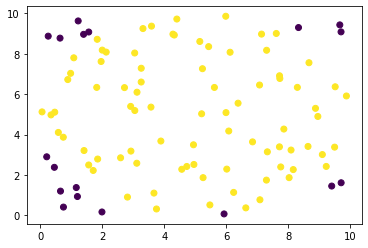

In [49]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y.astype('category').cat.codes, cmap='viridis')